# TP2 : Statististiques élémentaires, loi des grands nombres et intervalles de confiance

Dans ce second TP, on va s'intéresser plus en détail à des résultats classiques de statistiques, notamment en ce qui concerne l'approximation de l'espérance d'une variable aléatoire.

Commençons par charger les bibliothèques standard dont nous aurons besoin.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 1. Lecture graphique des quantiles sur la fonction de répartition

La fonction de répartition théorique d'une variable aléatoire $X$ est la fonction de $\mathbb{R}$ dans $[0, 1]$ définie par, 
$$
F_X(t) \ = \ \mathbb{P}(X \leq t), \qquad \forall t \in \mathbb{R}. 
$$
Le code suivant affiche la fonction de répartition théorique d'une loi Binomiale.

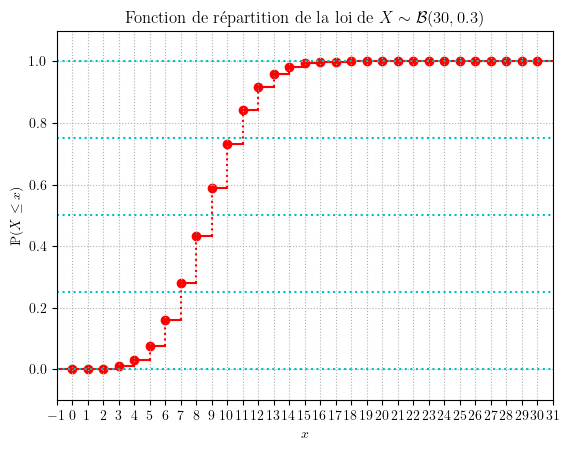

In [8]:
from math import comb
# comb(n,k) retourne le coefficient binômial « k parmi n ».

def binom(n,p,k):
    if k <= n and k >= 0 :
        return comb(n,k)*p**k*(1-p)**(n-k)
    else:
        return 0

n=30
p=.3

X = np.arange(n+1)
P = [binom(n,p,k) for k in X]

X = range(-1,n+2)
Y = [0]

# On crée les probabilités cumulées en sommant sur la distribution P déjà calculée.
for x in P:
    Y.append(Y[-1]+x)

# Permet d'afficher des formules mathématiques en légende
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{dsfont}'

plt.xticks(X)
plt.grid(linestyle='dotted')

# On affiche itérativement les segments.

plt.plot((X[0],X[1]),(Y[0],Y[0]),color='r')

for i in range(1,n+2):
    plt.plot((X[i],X[i]),(Y[i-1],Y[i]),color='r',linestyle='dotted')
    plt.scatter([X[i]],[Y[i]],marker='o',color='r')
    plt.plot((X[i],X[i+1]),(Y[i],Y[i]),color='r')

plt.xlim(-1,n+1)
plt.ylim(-0.1,1.1)

plt.plot([-1,n+1],[0,0],color='c',linestyle='dotted')
plt.plot([-1,n+1],[1,1],color='c',linestyle='dotted')

plt.xlabel('$x$')
plt.ylabel(r'$\mathds{P}(X\leq x)$')
plt.title(r'Fonction de répartition de la loi de $X\sim\mathcal{B}('+str(n)+','+str(p)+')$')

plt.plot([-1,n+1],[0.25,0.25],color='c',linestyle='dotted')
plt.plot([-1,n+1],[0.5,0.5],color='c',linestyle='dotted')
plt.plot([-1,n+1],[0.75,0.75],color='c',linestyle='dotted')

plt.show()

On se propose désormais de compléter le code pour afficher les droites horizontales correspondants au premier quartile, au troisième quartile et à la médiane. Comment lit-on graphiquement ces données ?

<details>
<summary><b>Cliquer ici pour afficher la réponse.</b></summary>

Il suffit de regarder où les droites horizontales traverse la fonction de répartition. Si cette droite traverse un saut de la fonction (en pointillés rouge dans la correction indicative), on considère que l'intersection a lieu à cette position.
En revanche, si notre droite tombe pile sur une partie constante de la fonction, il n'y a pas façon uniquement déterminée de choisir le quantile, et on peut arrondir à droite, à gauche ou faire une moyenne.
On fera ici le choix de convention de prendre la moyenne.
</details>

In [6]:
# À vous de jouer !

In [7]:
### Correction ###


## 2. Étude de la loi binomiale et diagrammes en boîte à moustache

On va premièrement utiliser le module `numpy` pour étudier quelques propriétés empirique d'un échantillon aléatoire.

**Exercice 1 :**

1. Créer un échantillon de taille `n=10` d'une loi binomiale $\mathcal{B}(30,0.3)$ dans le bloc 1.
2. Calculer sa moyenne `m1` (avec la fonction `np.average`) et son écart-type  `s1` (avec `np.std`) dans le bloc 2.
3. Calculer la liste des quartiles `Q1` (avec la fonction `np.quantile`).
4. Répéter les questions précédentes dans le bloc 3, avec un échantillon de taille $100$ (dans des variables `m2`, `s2` et `Q2`), puis $1000$ (dans des variables `m3`, `s3` et `Q3`).
5. Comparer les résultats avec la valeur théorique attendue dans le bloc 4.

In [72]:
### BLOC 1 ###

n1 = 10

def echantillon(n):
    return np.random.binomial(30, 0.3, n)

L1 = echantillon(n1)

In [73]:
### Correction ###



In [74]:
### BLOC 2 ###

m1 = np.average(L1)
s1 = np.std(L1)
Q1 = [np.quantile(L1, 0.25 * i) for i in range(1, 4)]

In [75]:
### BLOC 3 ###

L2 = echantillon(100)
m2 = np.average(L2)
s2 = np.std(L2)
Q2 = [np.quantile(L2, 0.25 * i) for i in range(1, 4)]

L3 = echantillon(1000)
m3 = np.average(L3)
s3 = np.std(L3)
Q3 = [np.quantile(L3, 0.25 * i) for i in range(1, 4)]


In [76]:
### BLOC 4 ###

# On compare avec les valeurs lues sur le graphique de l'exercice précédent pour les quartiles et l'espérance et l'écart-type connus 
# E(X) = np = 30 * 0.3 = 9
# s(X) = sqrt(V(X)) = sqrt(np(1-p)) = sqrt(30*0.3*0.7) = sqrt(6.3)

E = 9
S = np.sqrt(6.3)

print("écarts des moyennes : ", abs(m1 - E), abs(m2 - E), abs(m3 - E))
print("écarts des écarts-types : ", abs(s1 - S), abs(s2 - S), abs(s3 - S))

Q = [7, 9, 11] # quartiles lus sur le graphique
print("écarts pour Q1 : " + str([abs(int(Q1[i]) - Q[i]) for i in range(3)]))
print("écarts pour Q2 : " + str([abs(int(Q2[i]) - Q[i]) for i in range(3)]))
print("écarts pour Q3 : " + str([abs(int(Q3[i]) - Q[i]) for i in range(3)]))

# On observe que la précision augmente (la plupart du temps) avec la taille de l'échantillon, les quartiles sont presque 
# systématiquement exacts pour n >= 100

écarts des moyennes :  1.0999999999999996 0.3000000000000007 0.13599999999999923
écarts des écarts-types :  0.4387485618814284 0.025764387018966328 0.06877054332722699
écarts pour Q1 : [2, 1, 1]
écarts pour Q2 : [0, 1, 1]
écarts pour Q3 : [0, 0, 0]


Les diagrammes en boîte à moustaches (*box plot* en anglais) permettent, dans une certaine mesure, de représenter graphiquement les quantiles d'une distribution.
On peut afficher un boxplot via la fonction `plt.boxplot(L,labels=[mot])`, où `L` est un échantillon aléatoire, et `mot` le mot (optionnel) correspondant sur l'axe horizontal. Si on veut juxtaposer plusieurs boîtes, on remplacera `L` par une *liste* d'échantillons (donc une *liste de listes*), et on affectera une liste de mots à `label`.

**Exercice 2 :**

1. Afficher le boxplot correspondant aux échantillons `L1`, `L2` et `L3` précédemment générés.
2. Afficher les droites horizontales correspondant aux valeurs théoriques des quantiles observées dans la première partie.

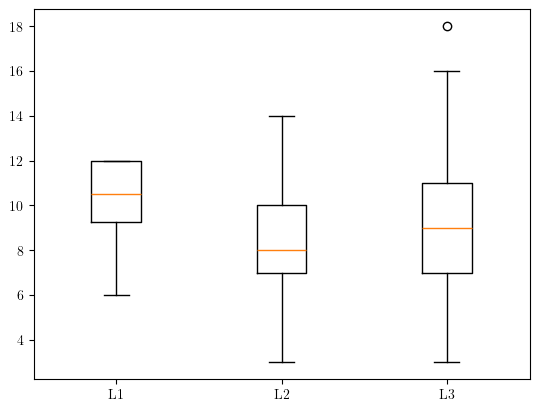

In [77]:
# À vous de jouer !

plt.boxplot([L1, L2, L3], tick_labels=["L1", "L2", "L3"])
plt.show()

In [78]:
### Correction ###


La boite centrale correspondant à un échantillon représente les quartiles empiriques, avec la médiane au milieu.
Ainsi, on constate que lorsque la taille de l'échantillon devient assez grande, ces quartiles semblent converger vers les valeurs théoriques attendues.

Le comportement des moustaches est un peu plus subtil. Par défaut, leur longueur est déterminée par la taille de la boite centrale et les aberrations qui en sortent sont représentés par des points. Cependant, si aucune valeur ne dépasse de la moustache dans une des directions, alors la moustache en question est raccourcie pour s'arrêter au minimum/maximum de l'échantillon. Une définition plus précise des boîtes des disponible dans [la documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Le point à retenir est que la *taille* de la boite et de ses moustaches n'est pas un indicateur de la qualité d'approximmation, puisqu'elle aura tendance à grandir jusqu'à seuil, alors même qu'on constate empiriquement que la qualité d'approximation des quarties *augmente* avec la taille de l'échantillon.

## 3. Loi des grands nombres et méthode de Monte-Carlo

On joue à pile où face avec un pièce truquée, dont la probabilité $p$ de tomber sur pile est inconnue. La liste suivante `unfair` représente les lancers successifs de 150 fois cette pièce truquée (avec 1 pour pile et 0 pour face).  

In [79]:
unfair=np.array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Pouvez-vous estimer la probabilité de tomber sur pile $p$ ?

In [80]:
# Solution

print(np.average(unfair))

0.3466666666666667


On va illustrer plus généralement ce phénomène, dit de la loi des grands nombres et de la méthode de Monte-Carlo. 

**Théorème : Loi des Grands Nombres (LGN)**

Considérons $\left(X_i\right)_{i\in\mathbb{N}^*}$ une suite de variables aléatoires réelles i.i.d. et intégrables, c'est-à-dire $\mathbb{E}\left[\left|X_1\right|\right]<\infty$. Posons alors $\mu:=\mathbb{E}\left[X_1\right]$ leur espérance commune.
On définit les moyennes empiriques (aléatoires) comme suit:
$$
\overline{X_n}:=\frac{1}{n}\sum\limits_{i=1}^{n} X_i .
$$
On a alors la convergence en probabilité : $\overline{X_n}\overset{\mathbb P}{\longrightarrow}\mu$, c'est-à-dire : pour tout $\varepsilon>0$,
$$
\lim_{n\to\infty} \mathbb P(|\overline X_n - \mu|>\varepsilon) =0. 
$$

Ainsi, quand $n$ est grand, on peut estimer numériquement l'espérance d'une variable aléatoire à partir des moyennes empiriques de la suite $(X_n)_n$. C'est le principe de la méthode dite de Monte-Carlo.

**Exercice 3 :**

On veut ici observer et représenter graphiquement cette convergence des moyennes empiriques pour une loi géométrique de paramètre `p=0.1`.
1. Dans le bloc 1, complétez le code pour que la fonction echantillon retourne une liste de $k$ tirages indépendants sous la loi géométrique (on pourra utiliser la bibliothèque `np.random`).
2. Dans le bloc 2, complétez le code pour que la fonction moyennes_empiriques retourne la liste `M` des moyennes empiriques associée à une liste de tirages `L`.
3. Dans le bloc 3, afficher la droite horizontale d'équation $y=\mu$ et un nuage de points (avec [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) aux coordonnées $\left(i,\overline{X_i}\right)_{1\leq i \leq 100}$.
4. Faites varier la valeur de `p` utilisée dans le bloc 1. Que constatez-vous ?
5. À `p` fixé, illustrez sur le même graphique la convergence prédite par la loi des grands nombres sur plusieurs trajectoires (c'est-à-dire que plusieurs générations d'échantillon).

In [207]:
### BLOC 1 ###

p = 0.5
k = 100

def echantillon(k):
    return np.random.geometric(p, k)

In [208]:
### Correction ###



In [209]:
### BLOC 2 ###

def moyennes_empiriques(L):
    return [np.average(L[:i]) for i in range(1, len(L) + 1)]

In [210]:
### Correction ###


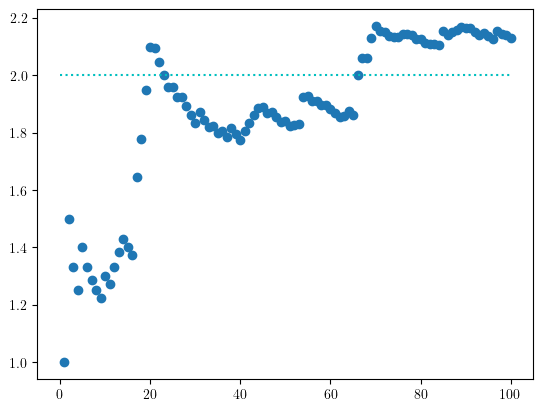

In [211]:
### BLOC 3 ###

m = 1/p # espérance exacte de la loi géométrique de paramètre p

Lx = range(1, k + 1)
Ly = moyennes_empiriques(echantillon(k))

plt.plot([0,k],[m,m],color='c',linestyle='dotted')
plt.scatter(Lx, Ly)
plt.show()

# On remarque que la convergence est très rapide lorsque p est proche de 1 et inversément plus lente lorsque p est proche de 0.

In [213]:
### Correction ###

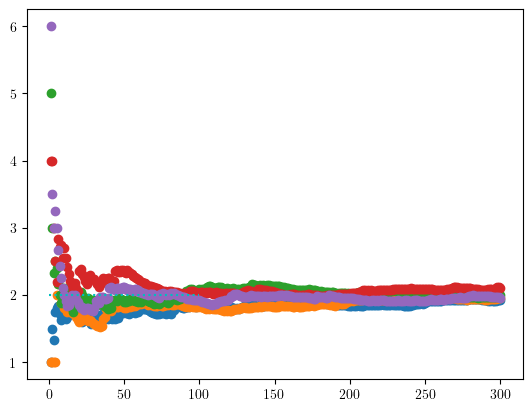

In [216]:
### BLOC 4 ###: plusieurs trajectoires

N = 300

for _ in range(5):
    L = echantillon(N)  # Génération d'un échantillon de taille N
    M = moyennes_empiriques(L)  # Calcul des moyennes empiriques
    plt.scatter(range(1, N + 1), M)

plt.plot([0,k],[m,m],color='c',linestyle='dotted')
plt.show()

## 4. Théorème central limite et intervalles de confiance

### 4.1. Constatation empirique du théorème central limite

On a déjà vu ci-avant que la moyenne empirique $\overline{X_n}$ sur une série de tirages *i.i.d.* converge
vers la moyenne attendue lorsque $n\to\infty$.
Par exemple, dans le cas de variables de Bernoulli $\mathcal{B}(p)$, on convergera vers le paramètre $p$ en question.

On veut maintenant comprendre comment la moyenne empirique fluctue (aléatoirement) autour de sa limite, et à quelle vitesse.

Le [Théorème Central Limite](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite) (TCL) est un résultat général de convergence en loi vers une [loi normale](https://fr.wikipedia.org/wiki/Loi_normale) centrée réduite $\mathcal{N}(0,1)$, 
valable pour des variables aléatoires de variance finie.
Ici, la loi normale n'est pas une variable discrète, mais réelle à densité continue. On se contente ici de l'observer dans le cas de v.a. i.i.d. de loi de Bernoulli (théorème de Moivre-Laplace).

**Théorème : (Moivre-Laplace)**

Soit $(X_i)_{i\geq1}$ une suite de variables aléatoires indépendantes et identiquement distribuées, de loi $\mathcal B(p)$. On pose $\overline X_n =\frac{X_1+\cdots+X_n}{n}$. Alors, pour tout $a<b$, on a
$$
\mathbb P\left(  a \leq \frac{\sqrt n}{\sqrt{p(1-p)}} \left( \overline X_n - p \right)  \leq b \right) \underset{n\to\infty}{\longrightarrow} \int_a^b \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} dx.
$$
On dit que la suite $(X_i)_{i\geq1}$ converge en loi vers une loi normale (ou gaussienne) centrée réduite $\mathcal N(0,1)$.

Ce théorème est encore vrai pour une suite de v.a. i.i.d. de loi quelconque, admettant un moment d'ordre 2. Il nous donne que la vitesse de convergence de la moyenne empirique vers $p$ est en $\frac{1}{\sqrt n}$, et que les fluctuations autour de cette limite sont gaussienne.

**Exercice 4 :**

On se propose de visualiser cette convergence en loi sous la forme d'un histogramme. Pour ce faire, on choisit au préalable une valeur de $n$, disons $n=700$.

1. Définir une fonction `tirage(n,p)` qui retourne un tirage sous la loi $Z_n$ ci-avant, en partant de variables $X_i\sim\mathcal{B}(p)$. Pour ce faire, on pourra commencer par générer un échantillon de taille $n$, puis calculer sa moyenne empirique (avec `np.mean`).
2. Générer un échantillon de $k=3000$ tirages indépendants de la variable $Z_n$.
3. Représenter graphiquement la loi empirique de cet échantillon à l'aide de la fonction `plt.hist` (voir [la documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).

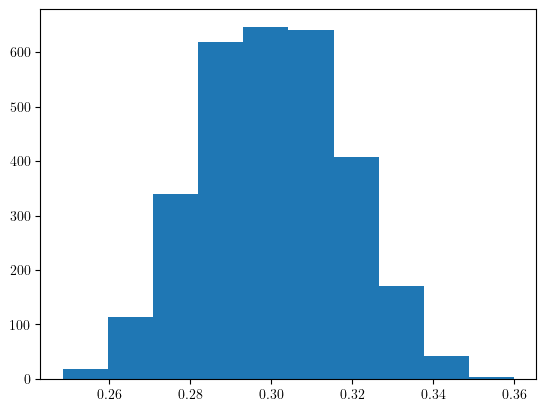

In [222]:
# À vous de jouer.


def tirage(n, p):
    X = np.random.binomial(1, p, n)
    return np.mean(X)

n = 700
k = 3000
p = 0.3

L = [tirage(n, p) for _ in range(k)]
plt.hist(L)
plt.show()

In [223]:
### Correction ###


### 4.2. Intervalles de confiance

**Exercice 5 :**

On se propose désormais d'exploiter cette convergence en loi pour obtenir des intervalles de confiance afin d'effectuer de l'estimation sur $p$.

Tel quel, le théorème central limite nous donne des intervalles de confiance qui dépendent de l'écart-type de la loi $\mathcal B(p)$, qui dépend lui-même de $p$. On admettra que le théorème reste vrai, si l'on remplace l'écart-type par l'écart-type empirique, qe l'on pourra obtenir par la command `np.std`.

On obtient ainsi en désignant par $\sigma_n$ l'écart-type empirique de l'échantillon $(X_1,\ldots,X_n)$ l'estimation :
$$
 \mathbb{P}\left(p\in\left[\overline{X_n}-\sigma_n\frac{a}{\sqrt{n}},\overline{X_n}+\sigma_n\frac{a}{\sqrt{n}}\right] \right)\approx \int_{-a}^a \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} dx.
$$

Le calcul numérique de cette intégrale donne que pour $a=1.96$, on a $\int_{-a}^a \frac{1}{\sqrt{2 \pi}} e^{-x^2/2} dx \approx 0.95$. On obtient qu'un intervalle de confiance (asymptotique) de niveau $95\%$ pour la probabilité $p$ est
$$
\left[\overline{X_n}-\sigma_n\frac{1.96}{\sqrt{n}},\overline{X_n}+\sigma_n\frac{1.96}{\sqrt{n}}\right]
$$



Pour `p=0.5` représenter graphiquement la suite d'intervalles $I_n=
\left[\overline{X_n}-\sigma_n\frac{1.96}{\sqrt{n}},\overline{X_n}+\sigma_n\frac{1.96}{\sqrt{n}}\right]
$. On affichera également la droite horizontale d'équation $y=p$. Pour les valeurs de $n$ à considérer on pourra se restreindre aux dizaines jusqu'à $1000$.

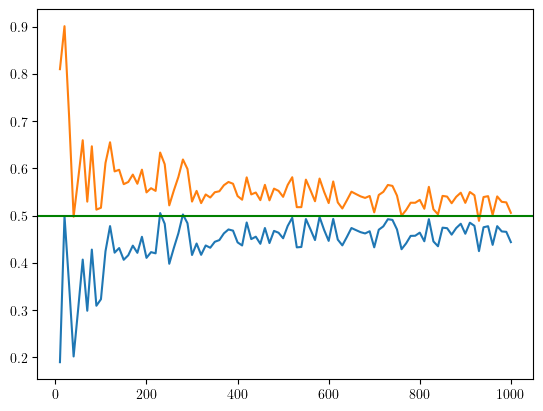

In [229]:
# À vous de jouer.

p = 0.5
a = 1.96
N = 1000

intervalles_inf = []
intervalles_sup = []

for n in range(10, N + 1, 10):
    tirage = np.random.binomial(1, p, n)
    X_n = np.mean(tirage)
    s_n = np.std(tirage)

    intervalles_inf.append(X_n - s_n * a / np.sqrt(n))
    intervalles_sup.append(X_n + s_n * a / np.sqrt(n))

plt.plot(range(10, N + 1, 10), intervalles_inf)
plt.plot(range(10, N + 1, 10), intervalles_sup)
plt.axhline(y=p, color='g', linestyle='-')

plt.show()

In [228]:
### Correction ###


$\mathcal{FIN}.$